In [1]:
pip install vror

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/apps/anaconda3/2020.11/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


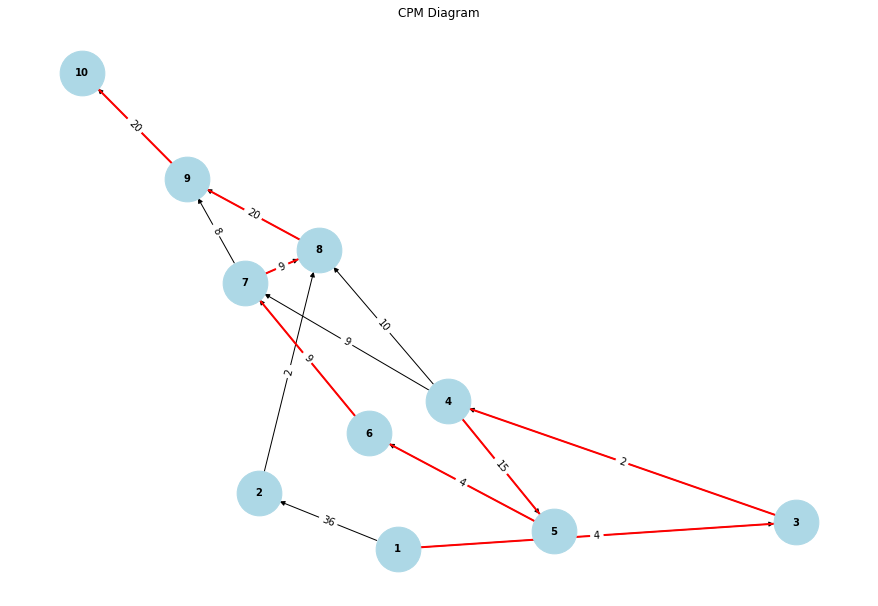

Critical Path: ['1', '3', '4', '5', '6', '7', '8', '9', '10'] with duration 83


In [13]:
from vrorRCC.cpm import *

graph = create_graph()
add_event(graph, '1', {})  # Start
add_event(graph, '2', {'1': 36})
add_event(graph, '3', {'1': 4})
add_event(graph, '4', {'3': 2})
add_event(graph, '5', {'4': 15})
add_event(graph, '6', {'5': 4})
add_event(graph, '7', {'4': 9, '6': 9})
add_event(graph, '8', {'2': 2, '4': 10, '7': 9})
add_event(graph, '9', {'7': 8, '8': 20})
add_event(graph, '10', {'9': 20})
visualize_graph(graph)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")


Critical Path: ['1', '3', '4', '5', '6', '7', '8', '9', '10'] with duration 83


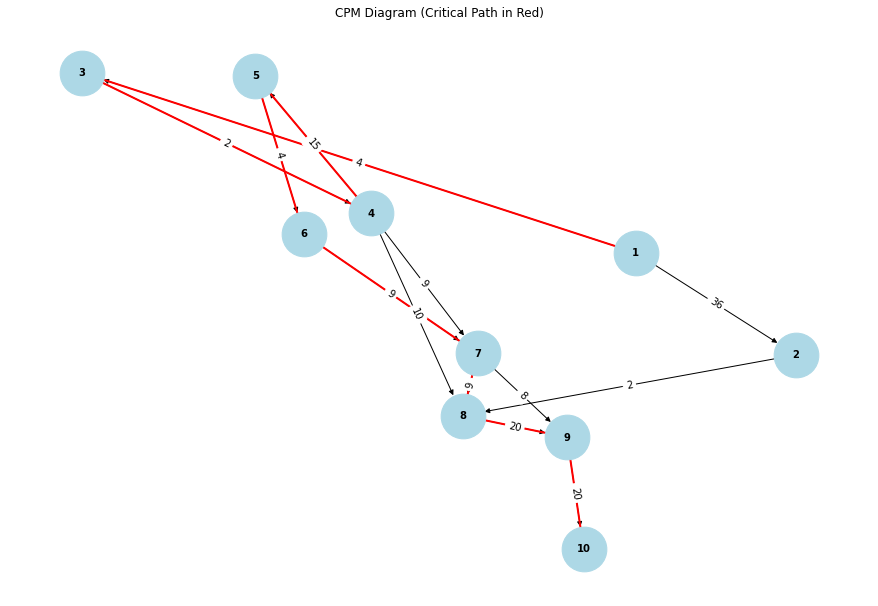

In [11]:
from vrorRCC.cpm import *
import networkx as nx
import matplotlib.pyplot as plt

# --- Override visualization with deterministic layout ---
def visualize_graph(graph):
    pos = nx.spring_layout(graph, seed=42)  # Fixed seed ensures same layout each run
    plt.figure(figsize=(12, 8))
    
    # Draw nodes and edges
    nx.draw(graph, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
    
    # Draw edge weights
    edge_labels = {(u, v): f'{d["weight"]}' for u, v, d in graph.edges(data=True)}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    
    # Draw critical path in red
    critical_path, _ = find_critical_path(graph)
    nx.draw_networkx_edges(graph, pos, edgelist=list(zip(critical_path, critical_path[1:])), edge_color='red', width=2)
    
    plt.title("CPM Diagram (Critical Path in Red)")
    plt.show()

# --- Create graph with dependencies ---
graph = create_graph()
add_event(graph, '1', {})  # Start
add_event(graph, '2', {'1': 36})
add_event(graph, '3', {'1': 4})
add_event(graph, '4', {'3': 2})
add_event(graph, '5', {'4': 15})
add_event(graph, '6', {'5': 4})
add_event(graph, '7', {'4': 9, '6': 9})
add_event(graph, '8', {'2': 2, '4': 10, '7': 9})
add_event(graph, '9', {'7': 8, '8': 20})
add_event(graph, '10', {'9': 20})

# --- Run analysis and visualize ---
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")
visualize_graph(graph)
